In [1]:
from metrics import mean_squared_error
from polynomial_regression import PolynomialRegression
from generate_regression_data import generate_regression_data
from load_json_data import load_json_data
import numpy as np 
import random
try:
    import matplotlib.pyplot as plt
except:
    import matplotlib
    matplotlib.use('Agg')
    import matplotlib.pyplot as plt



In [15]:
features, targets = generate_regression_data(4, 100, 0.1)

In [16]:
features

array([ 2.99281790e-01,  3.77260808e-01,  8.95358120e-01, -9.90626632e-01,
       -5.55782550e-01,  9.60675580e-01,  3.55760985e-01, -2.12268174e-01,
       -3.72737021e-01,  9.38524642e-01, -5.13544320e-01, -9.60899817e-01,
        5.41190146e-01,  3.00906886e-01, -9.94469145e-01,  1.50707458e-01,
        4.82407926e-01, -3.57890070e-01,  1.76852084e-01, -4.93473944e-03,
        7.02287627e-01,  2.77745363e-01, -1.92631872e-01,  8.84210239e-01,
        6.99767903e-01, -5.09244959e-01,  2.67204818e-04,  4.86658358e-01,
        4.54040541e-01,  6.95670496e-01,  3.07800964e-01,  4.03834755e-02,
        5.88783178e-01, -3.72628111e-01,  8.18736967e-01,  4.21322700e-03,
       -3.47448194e-01, -6.07441122e-01,  2.48226409e-01,  5.33670601e-01,
        3.96799800e-01, -4.56269904e-03,  4.37502245e-01, -8.20869710e-01,
        9.89577715e-02, -4.01043553e-01,  1.78901250e-02,  9.43936751e-01,
        1.39458705e-01, -3.77302262e-01,  3.44747171e-01,  1.56804143e-01,
        5.25441457e-01, -

In [17]:
targets

array([ 0.00872483,  0.64116344,  5.69323608,  3.05281006, -3.2853541 ,
        6.34703141,  0.84912885, -3.06959376, -3.46922147,  6.02838683,
       -3.51043615,  2.33985326,  1.67721471,  0.99334805,  3.06877279,
       -0.86975861,  1.38110762, -3.44206321, -0.74289532, -1.75541501,
        3.43609672,  0.03197872, -3.24642474,  5.6182265 ,  3.57153248,
       -3.63304796, -1.66995036,  1.72986729,  1.46393582,  3.16840687,
        0.54677447, -1.2949086 ,  2.6536081 , -3.67251336,  4.65950635,
       -1.56609649, -3.67927921, -2.81044253,  0.39472068,  1.52870638,
        0.72543106, -1.71991283,  1.15803671, -0.91053113, -0.96769275,
       -3.51000184, -1.33897828,  5.84766071, -0.99435472, -3.49056887,
        0.69394855, -0.93565844,  1.77830936, -3.39074415, -3.1213521 ,
        1.59921578,  6.36571958,  0.07942518, -1.67146872,  0.50063686,
        1.8921954 , -3.55528999,  0.27446693, -1.52142051, -3.19252096,
       -3.30132309,  2.25012629,  5.30632973,  2.50818285, -1.94

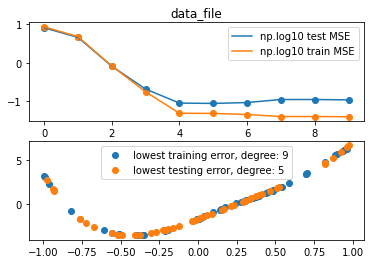

In [64]:
x = np.random.uniform(-1, 1, size=(10)) 
y = np.random.uniform(-1, 1, size=(10))
#print(targets.shape[0])
rand = random.sample(range(0, 10), 10)
counter = 0
for i in rand:
    x[counter] = features[i]
    y[counter] = targets[i]
    counter += 1

# now x: randomly selected 50 features
# now y: corresponding selected 50 targets
# (x,y): training dataset
# (a,b): testing dataset
a = np.delete(features, rand)
b = np.delete(targets, rand)

degr = [0 ,1, 2, 3, 4, 5, 6, 7, 8, 9]
trainMSE = []
mse = []
lowestTest = 0
lowestTestPred = 0
lowestTestD = 0
lowestTestError = 100
lowestTra = 0
lowestTraPred = 0
lowestTraD = 0
lowestTraError = 100

lowestTraCoef = None
lowestTestCoef = None
for t in range(10):
    learner = PolynomialRegression(degree=t)
    
    
    #print("trani: {}".format(t))
    #print('x: {}'.format(x))
    #print('y: {}'.format(y))
    learner.fit(x, y)
    #for i in rand:
        #a = np.delete(features, i, 0)
    predict = learner.predict(a)
    #print(a)
    mse.append(mean_squared_error(predict, b))
    trainPred = learner.predict(x)
    trainMSE.append(mean_squared_error(trainPred, y))
    #learner.visualize(a, b)
    #learner.visualize(a, predict)
    if mean_squared_error(predict, b) < lowestTestError:
        lowestTestError = mean_squared_error(predict, b)
        lowestTestD = t
        lowestTest = a
        lowestTestPred = predict
        lowestTestCoef = learner.parameters
    if mean_squared_error(trainPred, y) < lowestTraError:
        lowestTraError = mean_squared_error(trainPred, y)
        lowestTraD = t
        lowestTra = x
        lowestTraPred = trainPred
        lowestTraCoef = learner.parameters

degr = np.array(degr)
mse = np.array(mse)
trainMSE = np.array(trainMSE)
mse = np.log10(mse)
trainMSE = np.log10(trainMSE)
plt.figure(figsize=(6,4))
plt.xlabel('degree', fontsize=10)
plt.ylabel('mean_squared_error', fontsize=10)

plt.subplot(211)
plt.scatter(degr, mse)
plt.scatter(degr, trainMSE)
plt.title("data_file")
plt.plot(degr, mse, label ='np.log10 test MSE')
plt.plot(degr, trainMSE, label ='np.log10 train MSE')
plt.legend()

plt.subplot(212)
plt.scatter(lowestTra, lowestTraPred, label = 'lowest training error, degree: ' + str(lowestTraD))
plt.scatter(lowestTest, lowestTestPred, label = 'lowest testing error, degree: ' + str(lowestTestD))
#plt.plot(lowestTra, lowestTraPred, label = 'lowestTrain, degree: ')
#plt.plot(degr, lowestTest, label = 'lowestTest, degree: ')
plt.legend()


In [62]:
lowestTestCoef

array([-1.73877584,  6.52745251,  2.1529689 , -5.22464675,  4.7810414 ,
        0.56613789])

In [20]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y


array([-0.37273702,  0.89535812,  0.29928179,  0.37726081,  0.96067558,
        0.35576098, -0.99062663, -0.21226817, -0.55578255,  0.93852464])

# This is a polynomial of order <built-in function ord>.


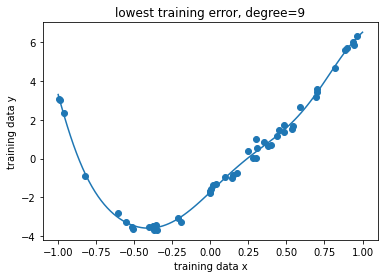

In [67]:
plt.figure(figsize=(6,4))
plt.xlabel('training data x', fontsize=10)
plt.ylabel('training data y', fontsize=10)    


plt.scatter(x, y)
#plt.scatter(lowestTra, lowestTraPred, label = 'lowestTrain, degree: ' + str(lowestTraD))
#plt.scatter(lowestTest, lowestTestPred, label = 'lowestTest, degree: ' + str(lowestTestD))
#plt.plot(lowestTra, lowestTraPred, label = 'lowestTrain, degree: ')
#plt.plot(degr, lowestTest, label = 'lowestTest, degree: ')
#plt.legend()

x_ = np.linspace(-1, 1, 100)
#plt.title("lowest testing error, degree=4")
#plt.plot(x_, PolyCoefficients(x_, lowestTestCoef))
plt.title("lowest training error, degree=9")
plt.plot(x_, PolyCoefficients(x_, lowestTraCoef))

# This is a polynomial of order <built-in function ord>.


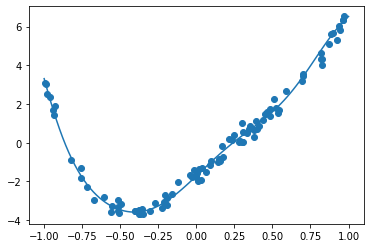

In [59]:
plt.scatter(features, targets)

x = np.linspace(-1, 1, 100)
#plt.plot(x, PolyCoefficients(x, lowestTestCoef), label = 'lowestTest, degree: ')
plt.plot(x, PolyCoefficients(x, lowestTraCoef), label = 'lowestTrain, degree: ')
